In [75]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as patheffects
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("logs.txt", sep=r"\s+", header=None, names=["fecha", "hora", "ip", "usuario", "resultado"])

In [78]:
df.head()

,fecha,hora,ip,usuario,resultado
0,2025-07-14,09:12:01,192.168.1.100,alice,ERROR
1,2025-07-14,09:15:22,192.168.1.101,bob,OK
2,2025-07-14,09:17:44,10.0.0.5,carol,ERROR
3,2025-07-14,09:19:58,203.0.113.45,alice,ERROR
4,2025-07-14,09:25:33,203.0.113.45,bob,OK


In [79]:
#primeramente filtro los errores para analizarlos
errores=df[df["resultado"]=="ERROR"]

In [80]:
# Verifico que hay datos de errores
print("Errores encontrados:")
print(errores.head())

Errores encontrados:
        fecha      hora             ip usuario resultado
0  2025-07-14  09:12:01  192.168.1.100   alice     ERROR
2  2025-07-14  09:17:44       10.0.0.5   carol     ERROR
3  2025-07-14  09:19:58   203.0.113.45   alice     ERROR
5  2025-07-14  09:26:12  198.51.100.23   carol     ERROR
6  2025-07-14  09:29:44   203.0.113.45   alice     ERROR


In [81]:
# Cuenta errores por IP y selecciona el top 5, es decir las IPs con mas errores
top_ips = errores["ip"].value_counts().head(5)
print("Top IPs con errores:", top_ips)

Top IPs con errores: ip
203.0.113.45     86
192.168.1.100    43
198.51.100.23    34
10.0.0.5         23
192.168.1.101    17
Name: count, dtype: int64


C:\Users\saray\AppData\Local\Temp\ipykernel_37608\3820383852.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


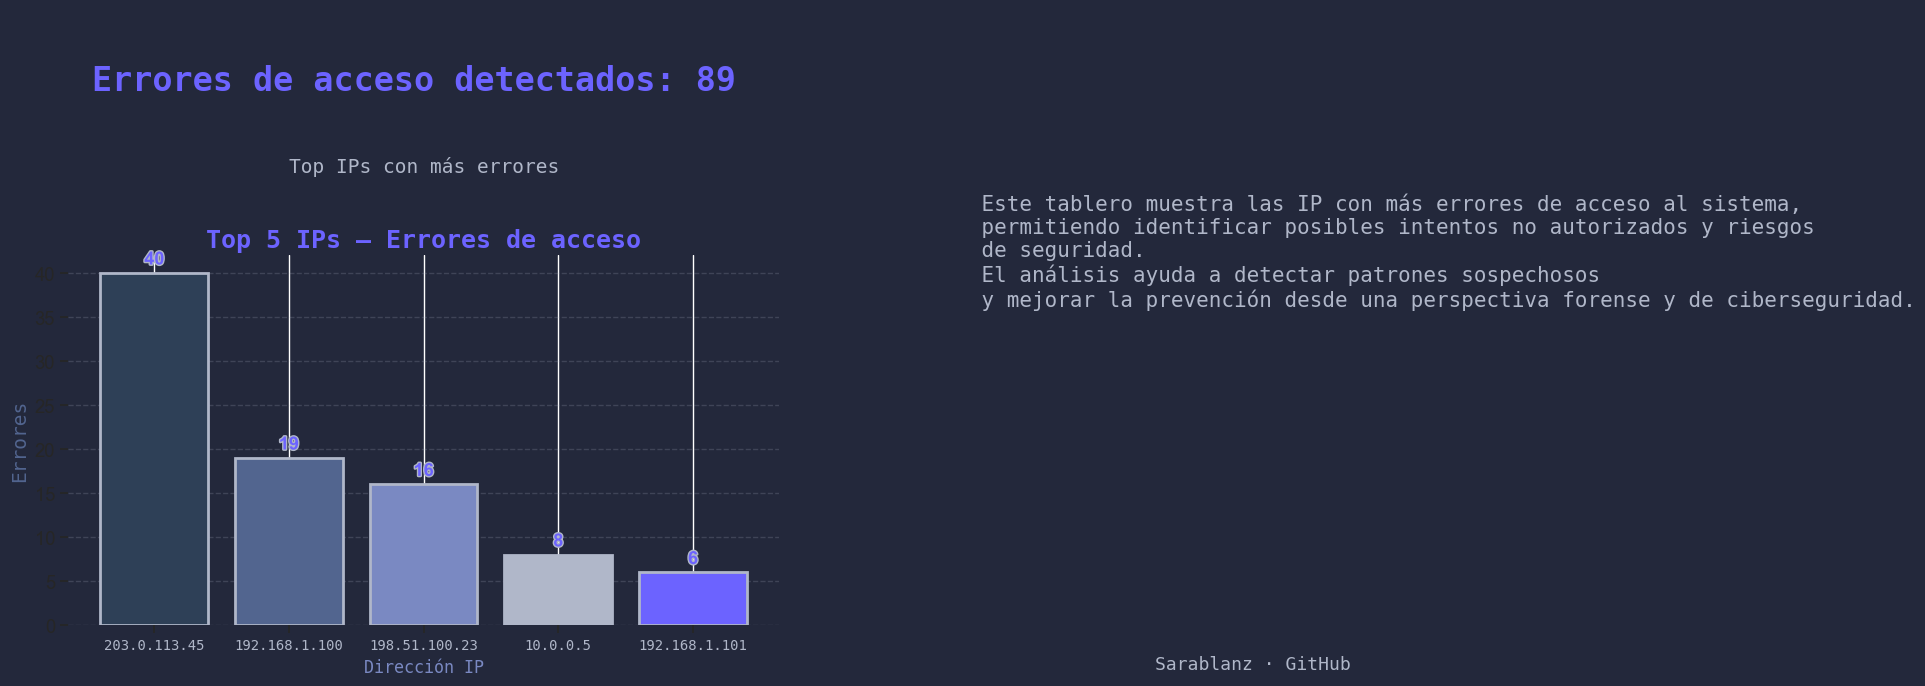

In [82]:

# Configuración estética
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_context("notebook", font_scale=1.2)

# Paleta corporativa azul-violeta
palette = ["#2E4057", "#52658F", "#7A89C2", "#B0B7C9", "#6C63FF"]

# Datos de ejemplo
top_ips = pd.Series([40, 19, 16, 8, 6], index=["203.0.113.45", "192.168.1.100", "198.51.100.23", "10.0.0.5", "192.168.1.101"])
error_trend = np.random.randint(5, 40, 12)
months = ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"]
total_errors = top_ips.sum()

fig = plt.figure(figsize=(15, 8), facecolor='#23283B')
gs = fig.add_gridspec(2, 2, height_ratios=[1,2], width_ratios=[2,1], wspace=0.18, hspace=0.22)

# --- KPI principal ---
ax0 = fig.add_subplot(gs[0, 0])
ax0.axis("off")
ax0.set_facecolor('#23283B')
ax0.text(0.5, 0.7, f"Errores de acceso detectados: {total_errors} ", fontsize=24, fontweight='bold',
         color='#6C63FF', ha='center', va='top', family='monospace')
#ax0.text(0.5, 0.35, f"Errores de acceso detectados: {total_errors}", fontsize=18,
         #color='#7A89C2', ha='center', va='center', family='monospace')
ax0.text(0.5, 0.15, "Top IPs con más errores", fontsize=14, color='#B0B7C9',
         ha='center', va='center', family='monospace')

# --- Gráfico de barras Top IPs ---
ax1 = fig.add_subplot(gs[1, 0])
ax1.set_facecolor('#23283B')
x_pos = np.arange(len(top_ips))
bars = ax1.bar(x_pos, top_ips.values, color=palette, edgecolor='#B0B7C9', linewidth=2, zorder=3)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(top_ips.index, fontsize=10, color='#B0B7C9', family='monospace')
ax1.set_title("Top 5 IPs – Errores de acceso", fontsize=18, fontweight='bold', color='#6C63FF', family='monospace')
ax1.set_xlabel("Dirección IP", fontsize=12, color='#7A89C2', family='monospace')
ax1.set_ylabel("Errores", fontsize=14, color='#52658F', family='monospace')
ax1.grid(axis="y", color='#B0B7C9', linestyle='--', alpha=0.20, zorder=0)
for bar in bars:
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height()+0.5, str(int(bar.get_height())),
             ha='center', va='bottom', fontsize=13, fontweight='bold', color='#6C63FF',
             path_effects=[patheffects.withStroke(linewidth=2, foreground='#B0B7C9')])
for spine in ax1.spines.values():
    spine.set_visible(False)

fig.text(0.70, 0.65, 
"""    Este tablero muestra las IP con más errores de acceso al sistema,
    permitiendo identificar posibles intentos no autorizados y riesgos 
    de seguridad.
    El análisis ayuda a detectar patrones sospechosos 
    y mejorar la prevención desde una perspectiva forense y de ciberseguridad.""",
    fontsize=15, color='#B0B7C9', ha='left', va='top', family='monospace')


# --- Pie de firma o logo personal ---

fig.text(
    0.98, 0.05,
    "Sarablanz · GitHub",
    fontsize=13,
    color='#B0B7C9',
    ha='right',
    va='bottom',
    family='monospace'
)

plt.tight_layout()
plt.savefig("dashboard_linkedin.png", dpi=300)
plt.show()